In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/db/'
%ls

/content/drive/My Drive/Colab Notebooks/db
conexion_bd.ipynb            FBITC012091.csv        test.csv   test.parquet
Copia_de_superstore_1.xls    london_merged.csv      test.hdf   test.pkl
covid_19_clean_complete.csv  poblacion_mundial.csv  test.json  test.xls


In [3]:
!pip install pandas==1.0.1


     |████████████████████████████████| 10.1 MB 5.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.1 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 1.0.1 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
pd.__version__

'1.0.1'

In [4]:
%ls

conexion_bd.ipynb            FBITC012091.csv        test.csv   test.parquet
Copia_de_superstore_1.xls    london_merged.csv      test.hdf   test.pkl
covid_19_clean_complete.csv  poblacion_mundial.csv  test.json  test.xls


In [5]:
df_covid= pd.read_csv('covid_19_clean_complete.csv')
df_covid.sample(10)
df_covid['Date']= pd.to_datetime(df_covid['Date'])

In [6]:
list(df_covid)

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 'Date',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'WHO Region']

In [7]:
df_covid = df_covid[['Country/Region',
 'Date',
 'Confirmed',
 'Deaths',
 'Recovered']]
df_covid

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Albania,2020-01-22,0,0,0
2,Algeria,2020-01-22,0,0,0
3,Andorra,2020-01-22,0,0,0
4,Angola,2020-01-22,0,0,0
...,...,...,...,...,...
49063,Sao Tome and Principe,2020-07-27,865,14,734
49064,Yemen,2020-07-27,1691,483,833
49065,Comoros,2020-07-27,354,7,328
49066,Tajikistan,2020-07-27,7235,60,6028


In [8]:
df_covid_time = df_covid.groupby('Date').sum()
df_covid_time.head(10)

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
2020-01-27,2927,82,61
2020-01-28,5578,131,107
2020-01-29,6166,133,125
2020-01-30,8234,171,141


In [9]:
df1 = df_covid_time['Confirmed'].iloc[10:15]
df1

Date
2020-02-01    12038
2020-02-02    16787
2020-02-03    19887
2020-02-04    23898
2020-02-05    27643
Name: Confirmed, dtype: int64

In [10]:
df2 = df_covid_time['Deaths'].iloc[12:17]
df2

Date
2020-02-03    426
2020-02-04    492
2020-02-05    564
2020-02-06    634
2020-02-07    719
Name: Deaths, dtype: int64

In [11]:
df1 - df2 # en teoría está viendo los sobrevivientes pues resta los confrimados (f1)  menos los muertos, aunque en la practica es evidente que no es asi
#pues no son las mismas fechas además teniendo presente que el covid tarda 15 días en mostrar sintomás lo más logico sería considerar los datos en fechas más lejanas pero es solo un ejemplo

Date
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19461.0
2020-02-04    23406.0
2020-02-05    27079.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [12]:
df_covid_time


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-23,15510481,633506,8710969
2020-07-24,15791645,639650,8939705
2020-07-25,16047190,644517,9158743


In [13]:
df_covid_time.diff() #me va a restar una fila con la anterior en este caso veremos cuantos casos se dan por día

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,99.0,1.0,2.0
2020-01-24,287.0,8.0,6.0
2020-01-25,493.0,16.0,3.0
2020-01-26,684.0,14.0,13.0
...,...,...,...
2020-07-23,282756.0,9966.0,169714.0
2020-07-24,281164.0,6144.0,228736.0
2020-07-25,255545.0,4867.0,219038.0


In [14]:
df_covid_time.diff().mean() #me da el promedio de los datos

Confirmed    88127.967914
Deaths        3497.427807
Recovered    50631.331551
dtype: float64

In [15]:
df_covid_time.diff().max()

Confirmed    282756.0
Deaths         9966.0
Recovered    284394.0
dtype: float64

In [16]:
df_diff= df_covid_time.diff()
df_diff

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,99.0,1.0,2.0
2020-01-24,287.0,8.0,6.0
2020-01-25,493.0,16.0,3.0
2020-01-26,684.0,14.0,13.0
...,...,...,...
2020-07-23,282756.0,9966.0,169714.0
2020-07-24,281164.0,6144.0,228736.0
2020-07-25,255545.0,4867.0,219038.0


In [17]:
df_covid_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28}}

In [18]:
df_diff=df_diff.fillna({'Confirmed': 555,
 'Deaths': 17,
 'Recovered': 28})

In [19]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,654.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1434.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-07-23,15510481.0,633506.0,8710969.0
2020-07-24,15791645.0,639650.0,8939705.0
2020-07-25,16047190.0,644517.0,9158743.0


In [20]:
df_diff.resample('7D').sum() #agrupa en 7 días con resample

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18320.0,361.0,714.0
2020-02-05,20777.0,621.0,3596.0
2020-02-12,29934.0,895.0,9276.0
2020-02-19,5098.0,699.0,12959.0
2020-02-26,12534.0,447.0,20029.0
2020-03-04,25949.0,1106.0,16121.0
2020-03-11,80567.0,3688.0,16142.0
2020-03-18,226132.0,11068.0,27053.0


In [21]:
df_diff.resample('7D').mean()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,796.857143,18.714286,15.285714
2020-01-29,2617.142857,51.571429,102.000000
2020-02-05,2968.142857,88.714286,513.714286
2020-02-12,4276.285714,127.857143,1325.142857
2020-02-19,728.285714,99.857143,1851.285714
2020-02-26,1790.571429,63.857143,2861.285714
2020-03-04,3707.000000,158.000000,2303.000000
2020-03-11,11509.571429,526.857143,2306.000000
2020-03-18,32304.571429,1581.142857,3864.714286


In [22]:
df_diff.resample('7D').max()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,2651.0,49.0,46.0
2020-01-29,4749.0,103.0,217.0
2020-02-05,3745.0,107.0,703.0
2020-02-12,13645.0,253.0,1742.0
2020-02-19,1761.0,207.0,3883.0
2020-02-26,2577.0,89.0,3387.0
2020-03-04,5024.0,279.0,2938.0
2020-03-11,15838.0,804.0,3410.0
2020-03-18,42165.0,2268.0,9541.0


In [23]:
df_diff.resample('W-Sun').sum() #W-Sun es para indicar que la suma se debe hacer cada domingo

,Confirmed,Deaths,Recovered
Date,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,407.0
2020-02-09,23308.0,544.0,2598.0
2020-02-16,30784.0,864.0,7262.0
2020-02-23,7411.0,697.0,11985.0
2020-03-01,9400.0,523.0,18904.0
2020-03-08,21576.0,807.0,17884.0
2020-03-15,58994.0,2667.0,15047.0
2020-03-22,173325.0,8367.0,21851.0


In [24]:
df_diff.resample('M').sum() #con 'M' es por mes

,Confirmed,Deaths,Recovered
Date,,,
2020-01-31,9927.0,213.0,219.0
2020-02-29,75379.0,2723.0,38095.0
2020-03-31,786049.0,41542.0,135760.0
2020-04-30,2397521.0,190226.0,815542.0
2020-05-31,2916654.0,138902.0,1595973.0
2020-06-30,4264167.0,137604.0,2695870.0
2020-07-31,6030788.0,142826.0,4186628.0


In [25]:
df_diff.resample('M').count() #usaremos count para saber cuantos registros hay en cada mes por día, en enero soloo se registraron 10 días 

,Confirmed,Deaths,Recovered
Date,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,27,27,27


In [26]:
df_cum=df_covid_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,654.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-07-25 00:00:00,16047190.0,644517.0,9158743.0
2020-07-25 12:00:00,NaN,NaN,NaN
2020-07-26 00:00:00,16251796.0,648621.0,9293464.0


In [27]:
df_cum.bfill() #rellena los valores nulos con el valor siguiente para rellenarlos con el valor anterior usamos ffill

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,654.0,18.0,30.0
2020-01-23 00:00:00,654.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-07-25 00:00:00,16047190.0,644517.0,9158743.0
2020-07-25 12:00:00,16251796.0,648621.0,9293464.0
2020-07-26 00:00:00,16251796.0,648621.0,9293464.0


In [28]:
df_cum.fillna(10) #rellena con el numero que yo quiero las filas 

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,10.0,10.0,10.0
2020-01-23 00:00:00,654.0,18.0,30.0
2020-01-23 12:00:00,10.0,10.0,10.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-07-25 00:00:00,16047190.0,644517.0,9158743.0
2020-07-25 12:00:00,10.0,10.0,10.0
2020-07-26 00:00:00,16251796.0,648621.0,9293464.0


In [29]:
df_cum = df_cum.interpolate() # interpolate coloca el valor medio entre filas vacías 

In [30]:
df_cum

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.5,17.5,29.0
2020-01-23 00:00:00,654.0,18.0,30.0
2020-01-23 12:00:00,797.5,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-07-25 00:00:00,16047190.0,644517.0,9158743.0
2020-07-25 12:00:00,16149493.0,646569.0,9226103.5
2020-07-26 00:00:00,16251796.0,648621.0,9293464.0


In [31]:
df_cum['rate']=1-df_cum['Deaths']/df_cum['Confirmed'] # en teroría esta es la tasa de sobrevivientes

In [32]:
df_cum


,Confirmed,Deaths,Recovered,rate
Date,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.5,17.5,29.0,0.971050
2020-01-23 00:00:00,654.0,18.0,30.0,0.972477
2020-01-23 12:00:00,797.5,22.0,33.0,0.972414
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-07-25 00:00:00,16047190.0,644517.0,9158743.0,0.959836
2020-07-25 12:00:00,16149493.0,646569.0,9226103.5,0.959964
2020-07-26 00:00:00,16251796.0,648621.0,9293464.0,0.960089


In [33]:
df_cum= df_cum.reset_index()
df_cum

,Date,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.5,17.5,29.0,0.971050
2,2020-01-23 00:00:00,654.0,18.0,30.0,0.972477
3,2020-01-23 12:00:00,797.5,22.0,33.0,0.972414
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
370,2020-07-25 00:00:00,16047190.0,644517.0,9158743.0,0.959836
371,2020-07-25 12:00:00,16149493.0,646569.0,9226103.5,0.959964
372,2020-07-26 00:00:00,16251796.0,648621.0,9293464.0,0.960089
373,2020-07-26 12:00:00,16366140.5,651328.5,9380775.5,0.960203


In [34]:
df_cum.groupby(pd.Grouper(key='Date', freq='M'))[['rate']].mean() #cuando la fecha no es mi indice entonces podemos usar grouper en la llave colocamos la columna, podemos colocar la frecuenvia en este ejemplo mes y en particular la columna con la que queremos compararar en este caso la frecuencia de supervivencia

,rate
Date,
2020-01-31,0.974591
2020-02-29,0.973457
2020-03-31,0.959735
2020-04-30,0.933620
2020-05-31,0.933231
2020-06-30,0.945622
2020-07-31,0.956382


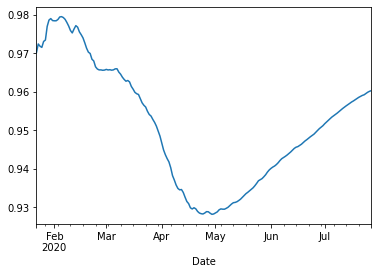

In [35]:
sr=df_cum.groupby(pd.Grouper(key='Date', freq='1D'))['rate'].mean()
sr.plot()

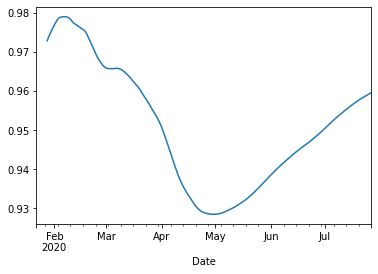

In [36]:
sr.rolling(window=7).mean().plot()

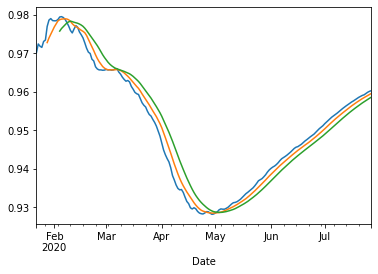

In [37]:
#podemos hacer comparacoiones rolling me permite ver la grafica por los e¡intervalos definidos en windows en estos ejemplos 7 y 14 días
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot() 

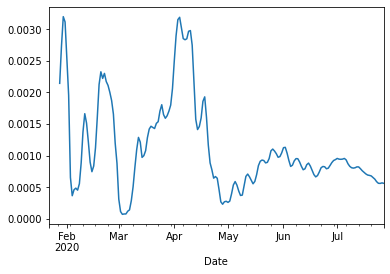

In [38]:
sr.rolling(window=7).std().plot()

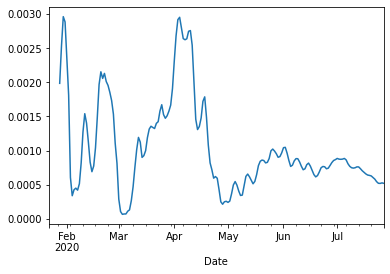

In [39]:
sr.rolling(window=7).apply(lambda x: np.std(x)).plot()

In [40]:
df_covid.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
US                       4290259
Brazil                   2442375
India                    1480073
Russia                    816680
South Africa              452529
                          ...   
Dominica                      18
Saint Kitts and Nevis         17
Greenland                     14
Holy See                      12
Western Sahara                10
Name: Confirmed, Length: 187, dtype: int64

In [41]:
df_time= df_covid.groupby(['Country/Region',pd.Grouper(key='Date',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region Date                                    
Afghanistan    2020-01-22          0       0          0
               2020-01-23          0       0          0
               2020-01-24          0       0          0
               2020-01-25          0       0          0
               2020-01-26          0       0          0
...                              ...     ...        ...
Zimbabwe       2020-07-23       2124      28        510
               2020-07-24       2296      32        514
               2020-07-25       2434      34        518
               2020-07-26       2512      34        518
               2020-07-27       2704      36        542

[35156 rows x 3 columns]

In [42]:
df_US = df_time.loc['US',:]
df_US

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0
...,...,...,...
2020-07-23,4038816,144430,1233269
2020-07-24,4112531,145560,1261624
2020-07-25,4178970,146465,1279414


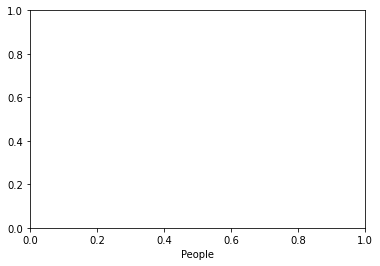

In [43]:
import matplotlib.pyplot as plt #con esta librería le puedo añadir informacion a mi grafica
plt.xlabel('Date')
plt.xlabel('People')
plt.show()


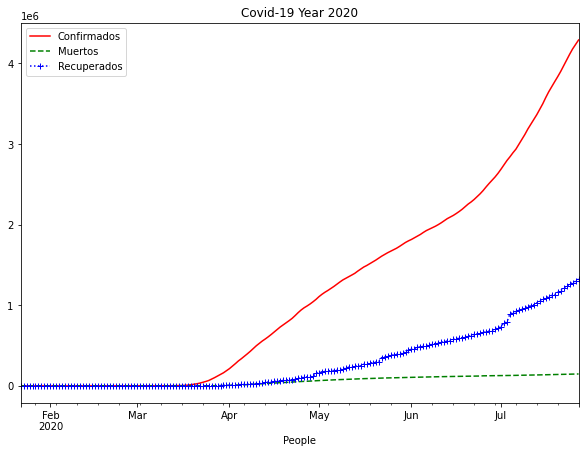

In [44]:
ax= df_US.plot(figsize = (10,7), title='Covid-19 Year 2020', legend = False, style=['r-','g--','b:+'])
ax.legend(['Confirmados','Muertos','Recuperados'])
plt.xlabel('Date')
plt.xlabel('People')
plt.show()

In [45]:
df_monthly = df_US.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
Date,,,
2020-01-31,7,0,0
2020-02-29,24,1,7
2020-03-31,188724,5605,7024
2020-04-30,1072667,64256,153947
2020-05-31,1799124,105364,444758
2020-06-30,2636414,127432,720631
2020-07-31,4290259,148011,1325804


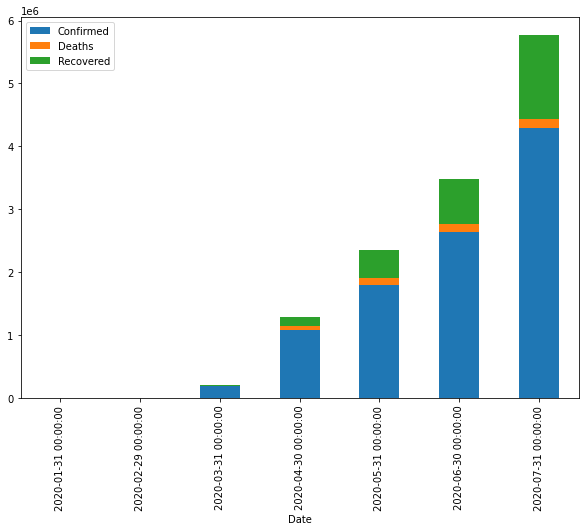

In [50]:
df_monthly.plot(figsize = (10,7),kind='bar', stacked=True)

In [51]:
df_monthly['Traiment']=df_monthly['Confirmed']- df_monthly['Deaths']-df_monthly['Recovered']

In [52]:
df_monthly

,Confirmed,Deaths,Recovered,Traiment
Date,,,,
2020-01-31,7,0,0,7
2020-02-29,24,1,7,16
2020-03-31,188724,5605,7024,176095
2020-04-30,1072667,64256,153947,854464
2020-05-31,1799124,105364,444758,1249002
2020-06-30,2636414,127432,720631,1788351
2020-07-31,4290259,148011,1325804,2816444


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe750ebec10>,
      dtype=object)

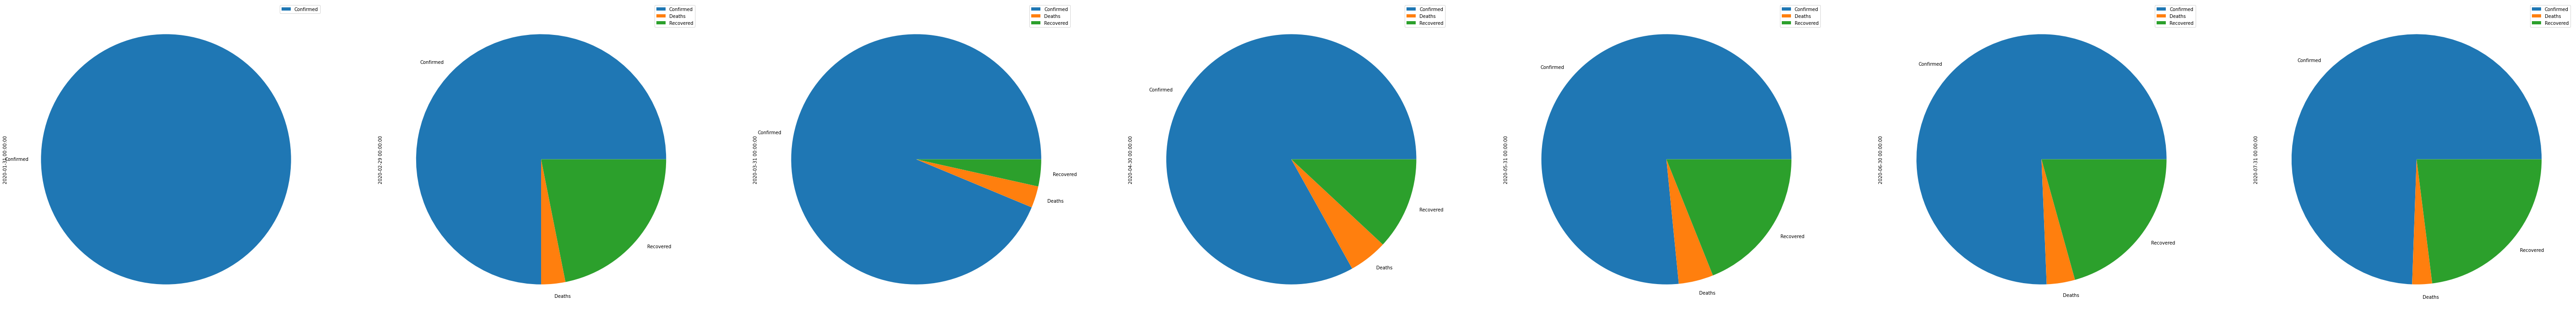

In [57]:
df_monthly[['Confirmed','Deaths','Recovered']].T.plot(figsize = (100,70),kind='pie', subplots=True)

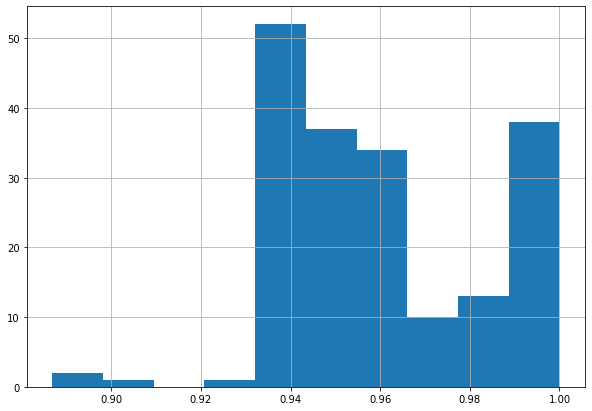

In [60]:
df_US['rate']=1 - df_US['Deaths']/ df_US['Confirmed']
df_US['rate'].hist(figsize = (10,7),bins=10)

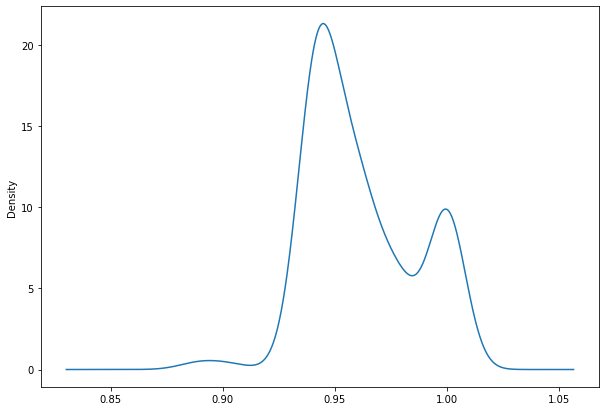

In [61]:
df_US['rate'].plot(kind='kde',figsize = (10,7))